In [48]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

In [49]:
train_dir = 'C:\\Users\\Jaanvi\\Downloads\\cats_and_dogs_small\\train'
validation_dir = 'C:\\Users\\Jaanvi\\Downloads\\cats_and_dogs_small\\validation'
test_dir = 'C:\\Users\\Jaanvi\\Downloads\\cats_and_dogs_small\\test'

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(
        rescale = 1./255)#target values between 0 and 1 

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size = (150, 150), 
        #standardize image size
        batch_size = 20, 
        #random seed for shuffling and transformations
        class_mode = 'binary')
        #binary classification

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [52]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [53]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
#Cov_Layer with 32 filters,  Window = 3x3, Input = 150x150, 3RGB) 
model.add(layers.MaxPooling2D((2,2)))
#Window = 2x2

model.add(layers.Conv2D(64, (3,3), activation = 'relu')) #image = 75x75
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu')) #image = 37x37
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu')) #image = 18x18  
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())  #image = 9x9
#Flatten layer is used to covert a multidimensional output to linear to pass it onto a Dense layer.

model.add(layers.Dense(512, activation ='relu'))

model.add(layers.Dense(1, activation ='sigmoid'))

                        

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [55]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ['acc'])

#binary_crossentropy calculates the score that penalizes the probabilities based on the distance from the expected value.
#optimizer changes the attributes of the neural network such as weights and learning rate to reduce the losses
#RMSProp, is an extension of gradient descent
#measure the performance of a model by accuracy



In [56]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps = 50)

C:\Users\Jaanvi\AppData\Local\Temp\ipykernel_6528\976694751.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 62s 602ms/step - loss: 0.6937 - acc: 0.5245 - val_loss: 0.6775 - val_acc: 0.5990
Epoch 2/20
100/100 [==============================] - 56s 561ms/step - loss: 0.6600 - acc: 0.6020 - val_loss: 0.6429 - val_acc: 0.6280
Epoch 3/20
100/100 [==============================] - 56s 560ms/step - loss: 0.6063 - acc: 0.6590 - val_loss: 0.7846 - val_acc: 0.5570
Epoch 4/20
100/100 [==============================] - 56s 555ms/step - loss: 0.5681 - acc: 0.7025 - val_loss: 0.6174 - val_acc: 0.6490
Epoch 5/20
100/100 [==============================] - 58s 576ms/step - loss: 0.5293 - acc: 0.7300 - val_loss: 0.6569 - val_acc: 0.6390
Epoch 6/20
100/100 [==============================] - 89s 896ms/step - loss: 0.5097 - acc: 0.7385 - val_loss: 0.5700 - val_acc: 0.6960
Epoch 7/20
100/100 [==============================] - 86s 858ms/step - loss: 0.4865 - acc: 0.7610 - val_loss: 0.5632 - val_acc: 0.7000
Epoch 8/20
100/100 [==============================] - 8

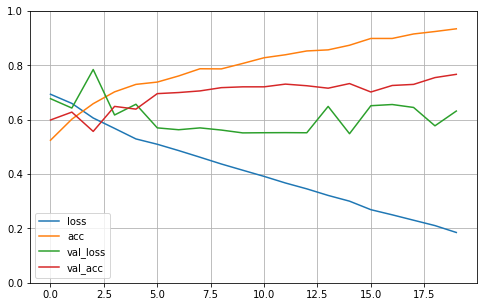

In [57]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
from tensorflow.keras import backend as K

K.clear_session() #avoids clutter from old models/layers
del model

In [59]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,#target values between 0 and 1
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,) 

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size = (150, 150), 
        #standardize image size
        batch_size = 32, 
        #random seed for shuffling and transformations
        class_mode = 'binary')
        #binary classification

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [60]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
#Cov_Layer with 32 filters,  Window = 3x3, Input = 150x150, 3RGB) 
model.add(layers.MaxPooling2D((2,2)))
#Window = 2x2

model.add(layers.Conv2D(64, (3,3), activation = 'relu')) #image = 75x75
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu')) #image = 37x37
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = 'relu')) #image = 18x18  
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())  #image = 9x9
#Flatten layer is used to covert a multidimensional output to linear to pass it onto a Dense layer.

model.add(layers.Dropout(0.5))
#Deactivates 50% of neurons during each epoch.
#avoids overfitting

model.add(layers.Dense(512, activation ='relu'))

model.add(layers.Dense(1, activation ='sigmoid'))

In [61]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ['acc'])

In [62]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 2000 // 32,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps = 1000 // 32)

C:\Users\Jaanvi\AppData\Local\Temp\ipykernel_6528\917567305.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
62/62 [==============================] - 113s 2s/step - loss: 0.6941 - acc: 0.5137 - val_loss: 0.6891 - val_acc: 0.5010
Epoch 2/20
62/62 [==============================] - 109s 2s/step - loss: 0.6858 - acc: 0.5483 - val_loss: 0.6925 - val_acc: 0.5302
Epoch 3/20
62/62 [==============================] - 107s 2s/step - loss: 0.6785 - acc: 0.5701 - val_loss: 0.6568 - val_acc: 0.6099
Epoch 4/20
62/62 [==============================] - 114s 2s/step - loss: 0.6609 - acc: 0.5884 - val_loss: 0.6435 - val_acc: 0.6260
Epoch 5/20
62/62 [==============================] - 116s 2s/step - loss: 0.6521 - acc: 0.6148 - val_loss: 0.6677 - val_acc: 0.6018
Epoch 6/20
62/62 [==============================] - 107s 2s/step - loss: 0.6361 - acc: 0.6225 - val_loss: 0.6269 - val_acc: 0.6270
Epoch 7/20
62/62 [==============================] - 109s 2s/step - loss: 0.6338 - acc: 0.6336 - val_loss: 0.6309 - val_acc: 0.6401
Epoch 8/20
62/62 [==============================] - 120s 2s/step - loss: 0.6193 - a

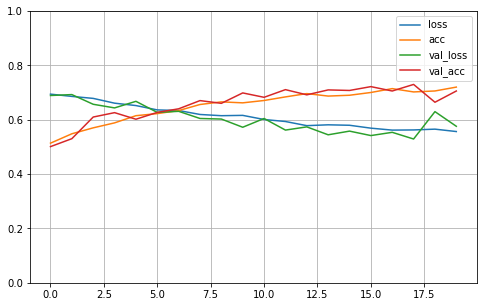

In [63]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
from tensorflow.keras import backend as K

K.clear_session()
del model